# Olympic Dataset Analysis (1896-2016)

**In this project we will analyse the dataset of olympic of year 1896-2016.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [2]:
df_athletes=pd.read_csv("athlete_events.csv")

In [3]:
df_regions=pd.read_csv("noc_regions.csv")

**Lets take a glance at the dataset using head() & tail() function.**

In [4]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df_athletes.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


**Now lets take a look at the quick discriptive stats of the dataset on which we r gonna work**

df_athletes.describe()

**from this discriptive stats we can conclude that:**

   -  The age of youngest player in olympic history was 10 years.
   - The age of eldest player in the olympic history was 97 years.
   - The tallest player ever played in olympic history was 226cm tall.
   - The shortest player ever played in the olympic was just 127cm short.
   - The avarage age, height, & weight of the olympians are 25, 175 & 70.
    
    

**Lets join both the datasets**

In [7]:
#Joining the datasets
df=df_athletes.merge(df_regions, how='inner', on='NOC')

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
#Checking the shape of datasets (No.of rows & columns)
df.shape

(270767, 17)

In [10]:
#Checking column names
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

# **2.Cleaning dataset**

**One thing i noticed that the column names(region, notes) are not capitalised so make it capitalised.**

In [11]:
#Renaming column names
df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [12]:
#Checking how mant null values are present in the dateset.
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
Region        21
Notes     265728
dtype: int64

In [13]:
#Checking those columns which are having at least one null value.
df.columns[df.isna().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [14]:
#Being an Indian.
#Print out the Indian athletes which are participated in olympic.
df[df['Team']=='India'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
159083,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
159084,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
159085,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
159086,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
159087,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
#Lets see the details of milkha singh.
df[df['Name']=='Milkha Singh']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
160190,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 200 metres,NaN,India,NaN
160191,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 400 metres,NaN,India,NaN
160192,111108,Milkha Singh,M,24.0,172.0,66.0,India,IND,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 400 metres,NaN,India,NaN
160193,111108,Milkha Singh,M,28.0,172.0,66.0,India,IND,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN


In [16]:
#Lets see the comparison between Inia and China.
India=df[df['Team']=='India'].describe()
China=df[df['Team']=='Japan'].describe()
print(India)
print(China)

                  ID          Age      Height      Weight         Year
count    1400.000000  1250.000000  887.000000  865.000000  1400.000000
mean    76701.817143    25.508000  171.577227   67.682659  1978.825714
std     38073.641662     5.171705    9.582507   14.340968    26.931590
min       281.000000    15.000000  137.000000   43.000000  1900.000000
25%     46736.000000    22.000000  165.000000   58.000000  1956.000000
50%     86988.000000    25.000000  172.000000   65.000000  1980.000000
75%    111071.250000    28.000000  178.000000   74.000000  2004.000000
max    135480.000000    66.000000  200.000000  125.000000  2016.000000
                  ID          Age       Height       Weight         Year
count    8289.000000  8173.000000  7408.000000  7348.000000  8289.000000
mean    81911.857522    24.423345   168.173326    63.215977  1983.835203
std     33529.498257     5.164253     9.381821    11.962552    23.903994
min       362.000000    11.000000   140.000000    28.000000  1912.000

**Some insights from above discriptive stats**

- The avarage age of Indian players is 25 year 6 months while in case of Japan it is 24 year 5 months.
- The avg height of Indian players is (171cm) while in case of Japan it is (168).so, Indian player r (3cm) taller than Japnese     players.
- The avg wt of Indian players is 67.68kg while in case of Japan it is 63.21kg

In [17]:
#Find the top 10 countries with participation rate(in terms of no of players have participated).
Top_10_countries= df['Team'].value_counts().sort_values(ascending=False).head(10)
Top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

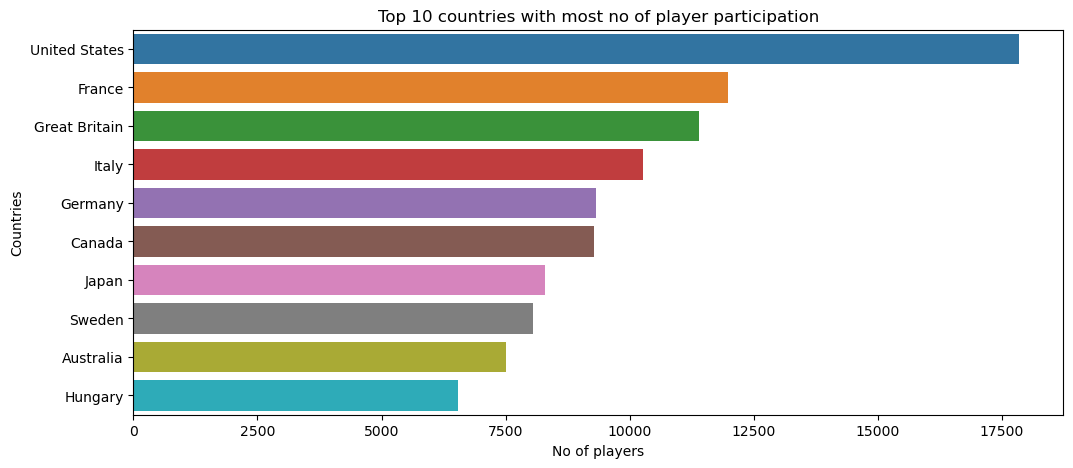

In [18]:
#Graphical representation of top 10 countries with most participation.
plt.figure(figsize=(12,5))
sns.barplot(x=Top_10_countries, y=Top_10_countries.index)
plt.title('Top 10 countries with most no of player participation')
plt.xlabel('No of players')
plt.ylabel('Countries')
plt.show()

(array([1.0000e+00, 1.3000e+01, 3.9000e+01, 1.8100e+02, 8.3600e+02,
        2.1920e+03, 3.8280e+03, 5.3600e+03, 8.1190e+03, 1.1630e+04,
        1.5246e+04, 1.9126e+04, 2.0793e+04, 2.1848e+04, 2.1708e+04,
        1.9676e+04, 1.7663e+04, 1.6014e+04, 1.4029e+04, 1.1452e+04,
        9.4820e+03, 7.5540e+03, 6.2430e+03, 4.7940e+03, 3.9830e+03,
        3.1280e+03, 2.5030e+03, 1.9510e+03, 1.6100e+03, 1.3990e+03,
        1.2100e+03, 9.5200e+02, 8.6500e+02, 7.9200e+02, 6.8300e+02,
        5.8300e+02, 4.2900e+02, 4.0800e+02, 4.0700e+02, 3.6200e+02,
        2.7800e+02, 1.9900e+02, 2.4400e+02, 2.0000e+02, 1.6200e+02,
        1.0400e+02, 1.3000e+02, 6.9000e+01, 1.6900e+02]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
        36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
        49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.]),
 <BarContainer object of 49 artists>)

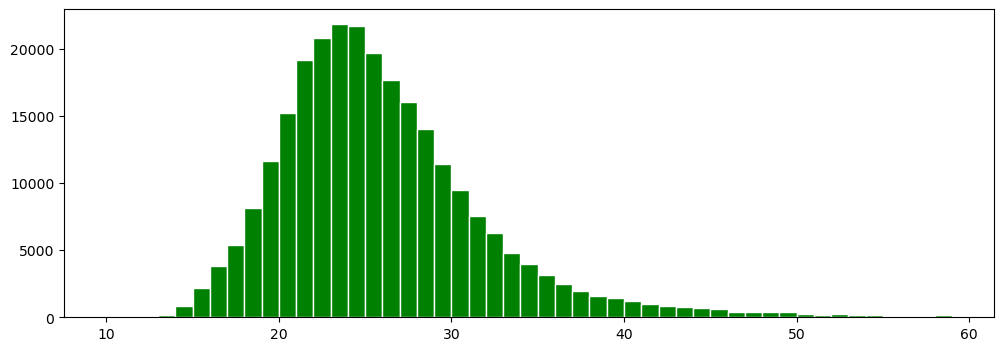

In [19]:
#Show the age distribution of player using histogram.
plt.figure(figsize=(12,4))
plt.hist(df.Age, bins=np.arange(10,60), color='Green',edgecolor='White')

In [20]:
#Print the name of sports played in winter olympic.
winter_games= df[df['Season']=='Winter'].Sport.unique()
for i in winter_games:
    print(i)

Speed Skating
Short Track Speed Skating
Curling
Figure Skating
Snowboarding
Cross Country Skiing
Ice Hockey
Freestyle Skiing
Alpine Skiing
Biathlon
Ski Jumping
Bobsleigh
Nordic Combined
Skeleton
Luge
Military Ski Patrol
Alpinism


In [21]:
#Print the names of the sports played in summer olympic.
summer_games= [df[df['Season']=='Summer'].Sport.unique()]
for i in summer_games:
    print(i)

['Basketball' 'Judo' 'Boxing' 'Wrestling' 'Swimming' 'Softball' 'Hockey'
 'Archery' 'Triathlon' 'Football' 'Rhythmic Gymnastics' 'Athletics'
 'Badminton' 'Fencing' 'Gymnastics' 'Volleyball' 'Baseball' 'Water Polo'
 'Shooting' 'Weightlifting' 'Cycling' 'Rowing' 'Sailing' 'Diving'
 'Modern Pentathlon' 'Art Competitions' 'Synchronized Swimming' 'Handball'
 'Canoeing' 'Table Tennis' 'Tennis' 'Taekwondo' 'Beach Volleyball'
 'Trampolining' 'Golf' 'Equestrianism' 'Tug-Of-War' 'Polo' 'Rugby Sevens'
 'Ice Hockey' 'Figure Skating' 'Roque' 'Rugby' 'Lacrosse' 'Jeu De Paume'
 'Cricket' 'Croquet' 'Motorboating' 'Basque Pelota' 'Alpinism'
 'Aeronautics' 'Racquets']


In [22]:
#Ratio of male Vs female participats in the olympic history.
male_counts= df['Sex'][df['Sex']=='M'].count()
female_counts= df['Sex'][df['Sex']=='F'].count()
total_counts= df['Sex'].count()

male_ratio= int((male_counts/total_counts)*100)
female_ratio=int((female_counts/total_counts)*100)
print(male_ratio)
print(female_ratio)
print("male to female participation ratio in olympic is {male_ratio}:{female_ratio}")

72
27
male to female participation ratio in olympic is {male_ratio}:{female_ratio}


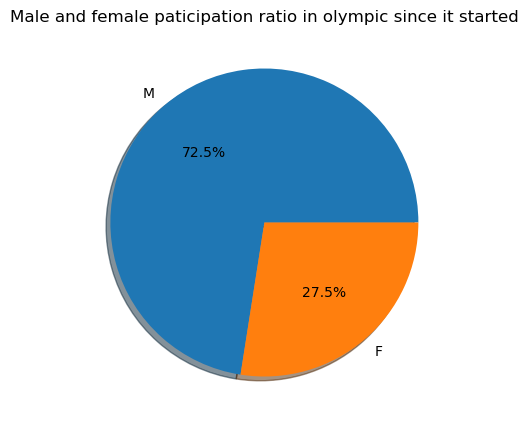

In [23]:
#Pie chart of gender distribution of olympic participation.
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True)
plt.title("Male and female paticipation ratio in olympic since it started", color='k')
plt.show()

In [24]:
#Ratio of male vs female participants after 1950.
male_counts= df['Sex'][df['Sex']=='M'][df.Year > 1950].count()
female_counts= df['Sex'][df['Sex']=='F'][df.Year > 1950].count()

male_ratio= int((male_counts/total_counts)*100)
female_ratio= int((female_counts/total_counts)*100)
print(f"male to female participation ratio in olympic after 1950 is {male_ratio}:{female_ratio}")

male to female participation ratio in olympic after 1950 is 56:26


In [25]:
#Male-female participation on each olympic and the gap between them.
Year=np.arange(1896,2017,4).tolist()

for i in Year:
    
    male_counts = df["Sex"][df["Sex"]=='M'][df["Year"]>i].count()
    female_counts = df["Sex"][df["Sex"]=='F'][df["Year"]>i].count()
    male_ratio = int((male_counts/total_counts)*100)
    female_ratio = int((female_counts/total_counts)*100)
    gap = male_ratio - female_ratio
    try:
        venue = df.City[df.Year==i].unique()[0]
    except:
        venue = 'Unknown'
    print(f"Male-female ratio in {venue}({i}) is {male_ratio} : {female_ratio} & the gap is {gap}")

Male-female ratio in Athina(1896) is 72 : 27 & the gap is 45
Male-female ratio in Paris(1900) is 71 : 27 & the gap is 44
Male-female ratio in St. Louis(1904) is 71 : 27 & the gap is 44
Male-female ratio in London(1908) is 69 : 27 & the gap is 42
Male-female ratio in Stockholm(1912) is 67 : 27 & the gap is 40
Male-female ratio in Unknown(1916) is 67 : 27 & the gap is 40
Male-female ratio in Antwerpen(1920) is 66 : 27 & the gap is 39
Male-female ratio in Paris(1924) is 64 : 27 & the gap is 37
Male-female ratio in Amsterdam(1928) is 62 : 27 & the gap is 35
Male-female ratio in Los Angeles(1932) is 61 : 26 & the gap is 35
Male-female ratio in Berlin(1936) is 58 : 26 & the gap is 32
Male-female ratio in Unknown(1940) is 58 : 26 & the gap is 32
Male-female ratio in Unknown(1944) is 58 : 26 & the gap is 32
Male-female ratio in London(1948) is 56 : 26 & the gap is 30
Male-female ratio in Helsinki(1952) is 53 : 25 & the gap is 28
Male-female ratio in Stockholm(1956) is 51 : 25 & the gap is 26
M

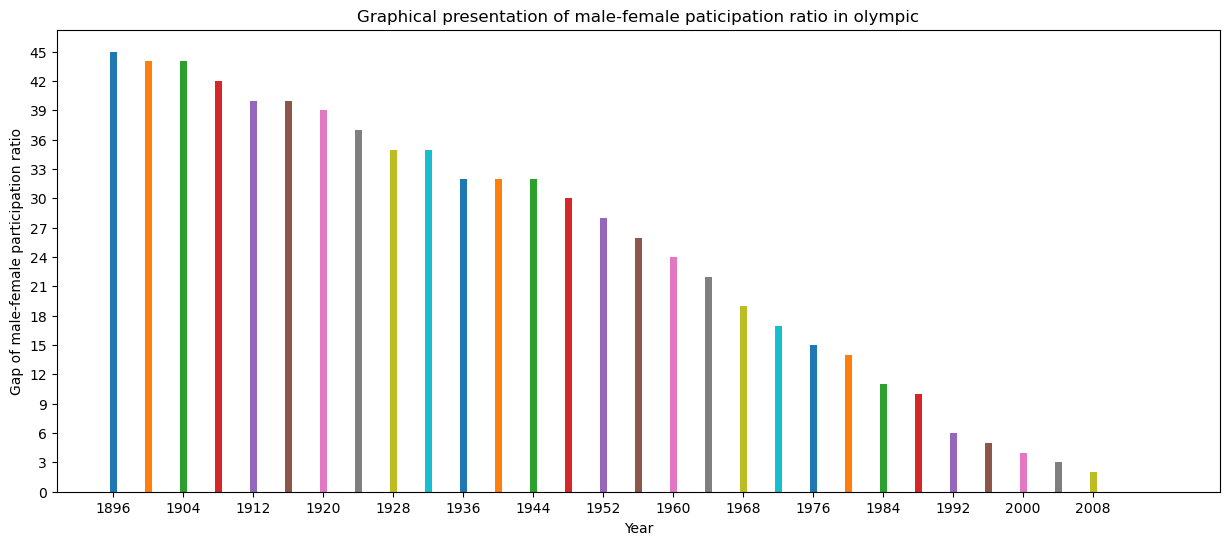

In [26]:
#Grapgical representation of male-female participation ratio in olympic since 1896.
plt.figure(figsize=(15,6))
plt.title("Graphical presentation of male-female paticipation ratio in olympic")
plt.xlabel("Year")
plt.ylabel("Gap of male-female participation ratio")
plt.yticks(np.arange(0,50,3))
plt.xticks(np.arange(1896,2016,8))
for i in Year:
    
    male_counts = df["Sex"][df["Sex"]=='M'][df["Year"]>i].count()
    female_counts = df["Sex"][df["Sex"]=='F'][df["Year"]>i].count()
    male_ratio = int((male_counts/total_counts)*100)
    female_ratio = int((female_counts/total_counts)*100)
    gap = int(male_ratio - female_ratio)
    
    plt.bar(i,gap)
    
plt.show()

**Conclusion**
- At the time when olympic were started in (1896) there was large gap in male-female participation ratio i.e 45.
- With time the male-female participation ratio keeps decreasing.
- In the year of 1952 the gap was around 25.
- By the end of 20th century the gap came down to just 4-5.
- In the year 2012 first time in the olympic history the male-female participation ratio became 0.

In [27]:
#Find the total no of female participants in each summer olympic.
female_athletes = df[(df["Sex"]=='F') & (df["Season"]=='Summer')][['Year', 'Sex']]
female_athletes = female_athletes.groupby('Year').count().reset_index()
female_athletes.tail()

,Year,Sex
23,2000,5418
24,2004,5531
25,2008,5793
26,2012,5791
27,2016,6203


In [28]:
#Graphical representation of woman participation in summer olympic.
woman_summer_df = df[(df["Sex"]=='F') & (df["Season"]=='Summer')]

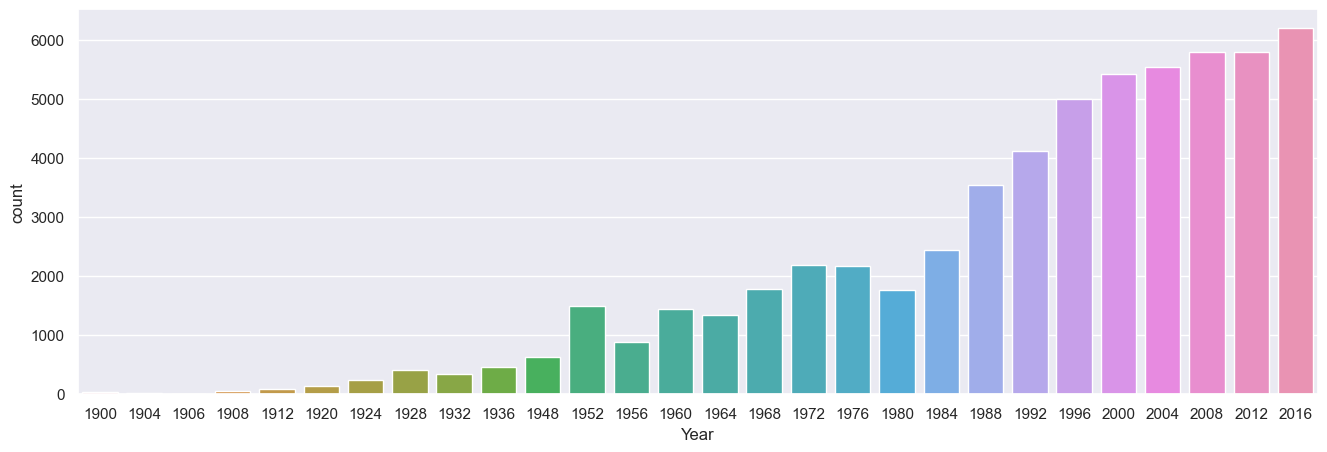

In [29]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,5))
sns.countplot(x='Year', data= woman_summer_df)
plt.show()

In [30]:
 #Find the total no of male participants in each summer olympic.
male_athletes = df[(df["Sex"]=='M') & (df["Season"]=='Summer')][['Year', 'Sex']]
male_athletes = male_athletes.groupby('Year').count().reset_index()
male_athletes.tail()

,Year,Sex
24,2000,8380
25,2004,7890
26,2008,7773
27,2012,7093
28,2016,7453


In [31]:
#Grapgical representation of men partiipation in summer olympic.
men_summer_df = df[(df["Sex"]=='M') & (df["Season"]=='Summer')]

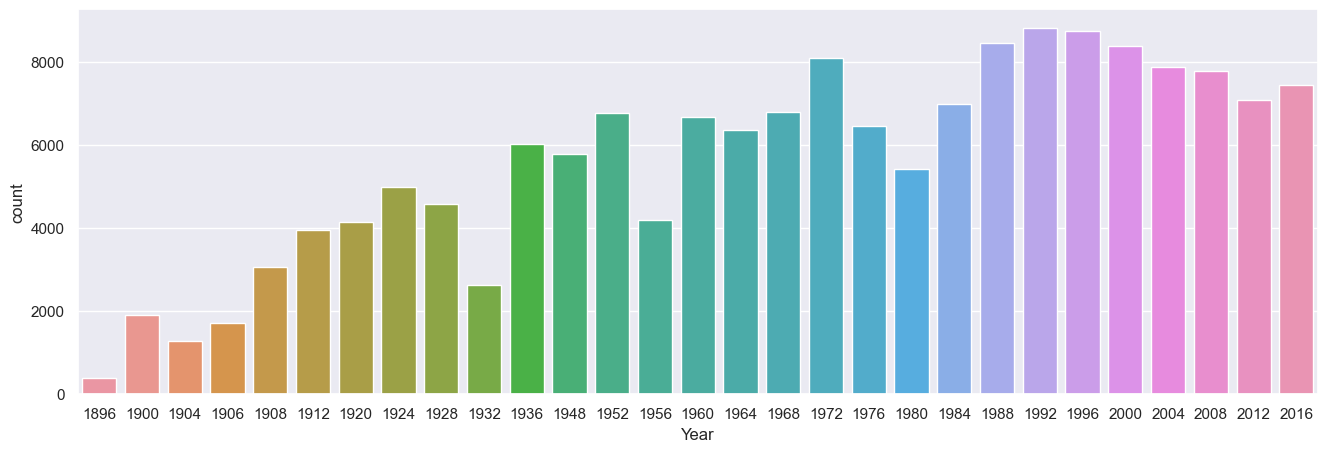

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,5))
sns.countplot(x='Year', data= men_summer_df)
plt.show()

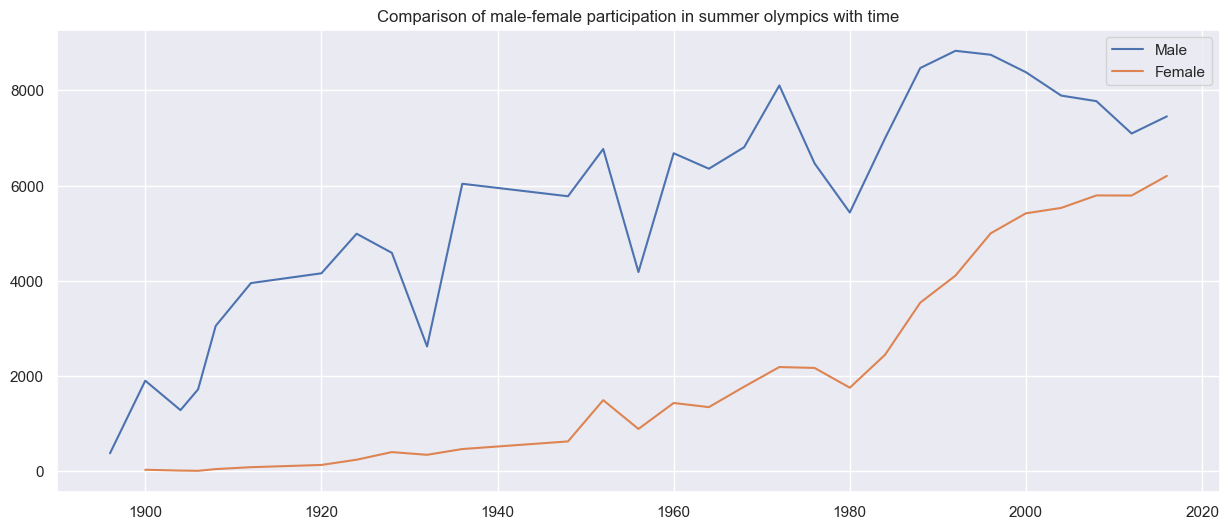

In [33]:
 #Find the total no of male participants in each summer olympic.
male_participants_yearwise = df[(df["Sex"]=='M') & (df["Season"]=='Summer')][['Year', 'Sex']]
male_participants_yearwise = male_participants_yearwise.groupby('Year').count()

#Find the total no of female participants in each summer olympic.
female_participants_yearwise = df[(df["Sex"]=='F') & (df["Season"]=='Summer')][['Year', 'Sex']]
female_participants_yearwise = female_participants_yearwise.groupby('Year').count()

#Plotting a linr graph for comparing male-female participation in summer olympic.
plt.figure(figsize=(15,6))
plt.plot(male_participants_yearwise['Sex'], label='Male')
plt.plot(female_participants_yearwise['Sex'], label='Female')
plt.title("Comparison of male-female participation in summer olympics with time")
plt.legend()
plt.show()


In [34]:
#Find the top 10 countries with most no of medals.
top_countries_with_medals = df[['Team','Medal']]
top_countries_with_medals = top_countries_with_medals.groupby('Team').count().sort_values(by = 'Medal', ascending=False).reset_index()
top_10_countries_with_medals = top_countries_with_medals.head(10)
top_10_countries_with_medals

,Team,Medal
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
5,Italy,1527
6,Sweden,1434
7,Australia,1306
8,Canada,1243
9,Hungary,1127


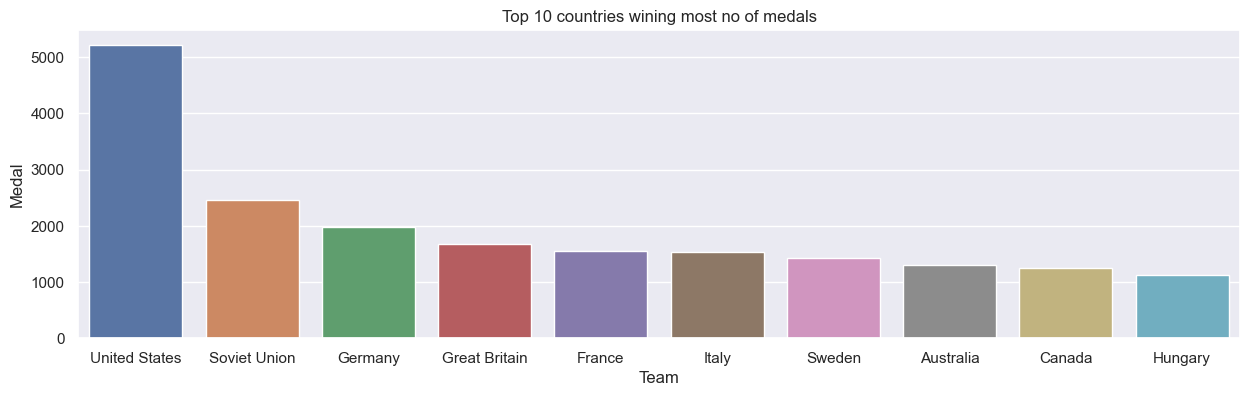

In [35]:
#Graphical representation of top 10 countries with most no of medals.
plt.figure(figsize=(15,4))
sns.barplot(x=top_10_countries_with_medals["Team"], y=top_countries_with_medals['Medal'])
plt.title("Top 10 countries wining most no of medals")
plt.show()

In [36]:
#Find the details of those players who won the gold medal & older than 50 years.
df_goldmedelist_above_50 = df[(df["Age"] > 50) & (df["Medal"]=='Gold')][["Name","Age","Team","Sport","Medal"]]
df_goldmedelist_above_50.head()

,Name,Age,Team,Sport,Medal
7391,Anders Peter Nielsen,52.0,Denmark,Shooting,Gold
10718,Isaac Lazarus Israls,63.0,Netherlands,Art Competitions,Gold
12975,"Hendrikus ""Driekske"" van Bussel",51.0,Netherlands,Archery,Gold
19305,Everard Coenraad Endt,59.0,Llanoria,Sailing,Gold
22547,Charles Jacobus,64.0,United States,Roque,Gold


In [37]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [38]:
#Find how many gold medals won by male-female players.
gold_medalist = df[df["Medal"]=="Gold"]["Medal"].count()
print(gold_medalist)

13371


In [39]:
#Find the total no of gold medal won by male & female.(Genderwise)
male_gold_medalist = df[(df["Sex"]=='M') & (df["Medal"]=='Gold')]["Medal"].count()
female_gold_medalist = df[(df["Sex"]=='F') & (df["Medal"]=='Gold')]["Medal"].count()
print("Male players won total",male_gold_medalist,"gold medals.")
print("Female players won total",female_gold_medalist,"gold medals.") 

Male players won total 9624 gold medals.
Female players won total 3747 gold medals.


In [44]:
#Find how many bronze medals won by male-female players.
bronze_medalist = df[df["Medal"]=="Bronze"]["Medal"].count()
print(bronze_medalist)

13291


In [41]:
#Find the total no of bronze medal won by male & female.(GEnderwise)
male_bronze_medalist = df[(df["Sex"]=='M') & (df["Medal"]=='Bronze')]["Medal"].count()
female_bronze_medalist = df[(df["Sex"]=='F') & (df["Medal"]=='Bronze')]["Medal"].count()
print("Male players won total",male_bronze_medalist,"bronze medals.")
print("Female players won total",female_bronze_medalist,"bronze medals.") 

Male players won total 9524 bronze medals.
Female players won total 3767 bronze medals.


In [45]:
#Find how many silver medals won by male-female players.
silver_medalist = df[df["Medal"]=="Silver"]["Medal"].count()
print(silver_medalist)

13112


In [43]:
#Find the total no of silver medal won by male & female.(Genderwise)
male_silver_medalist = df[(df["Sex"]=='M') & (df["Medal"]=='Silver')]["Medal"].count()
female_silver_medalist = df[(df["Sex"]=='F') & (df["Medal"]=='Silver')]["Medal"].count()
print("Male players won total",male_silver_medalist,"silver medals.")
print("Female players won total",female_silver_medalist,"silver medals.") 

Male players won total 9380 silver medals.
Female players won total 3732 silver medals.
